In [1]:
!pip install keras

In [2]:
!pip install graphviz
!pip install pydot3 pydot-ng

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pydot
from __future__ import print_function
import keras
from keras.utils import np_utils
from keras.callbacks import EarlyStopping
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot


Using TensorFlow backend.


In [4]:
def plot_history(history):
    # print(history.history.keys())

    # 精度の履歴をプロット
    plt.plot(history.history['acc'], marker='.')
    plt.plot(history.history['val_acc'], marker='.')
    plt.title('model accuracy')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.grid()
    plt.legend(['acc', 'val_acc'], loc='lower right')
    plt.show()

    # 損失の履歴をプロット
    plt.plot(history.history['loss'], marker='.')
    plt.plot(history.history['val_loss'], marker='.')
    plt.title('model loss')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.grid()
    plt.legend(['loss', 'val_loss'], loc='lower right')
    plt.show()

In [5]:
if __name__ == "__main__":
    batch_size = 128
    nb_classes = 10
    nb_epoch = 100
    # input image dimensions
    img_rows, img_cols = 28, 28
    # MNISTデータのロード
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    if K.image_dim_ordering() == 'th':
        x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
        x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
        input_shape = (1, img_rows, img_cols)
    else:
        x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
        x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
        input_shape = (img_rows, img_cols, 1)
        
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # one-hot-encoding
    y_train = np_utils.to_categorical(y_train, nb_classes)
    y_test = np_utils.to_categorical(y_test, nb_classes)

    # 多層ニューラルネットワークモデルを構築
    model = Sequential()
    model.add(Conv2D(32, (3, 3),
                 activation='relu',
                 input_shape=input_shape))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    #    model.add(Dropout(0.25))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))

    #    model.add(Dropout(0.5))
    model.add(Dense(nb_classes, activation='softmax'))
    # モデルのサマリを表示
    model.summary()

    # モデルをコンパイル
    model.compile(loss='categorical_crossentropy',
                  optimizer=keras.optimizers.Adam(),
                  metrics=['accuracy'])
    SVG(model_to_dot(model).create(prog='dot', format='svg'))
    # Early-stopping
    early_stopping = EarlyStopping(patience=0, verbose=1)

    # モデルの訓練
    history = model.fit(x_train, y_train,
                        batch_size=batch_size,
                        epochs=nb_epoch,
                        verbose=1,
                        validation_split=0.1,
                        callbacks=[early_stopping])


    # モデルの評価
    loss, acc = model.evaluate(x_test, y_test, verbose=0)

    print('Test loss:', loss)
    print('Test acc:', acc)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 12, 12, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
fla

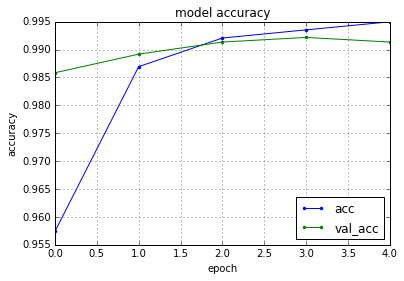

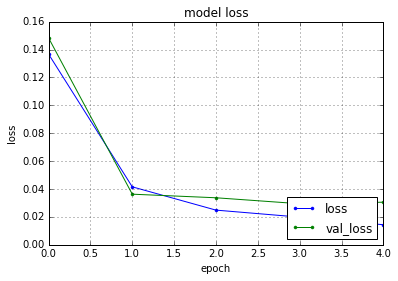

In [6]:
%matplotlib inline 
plot_history(history)

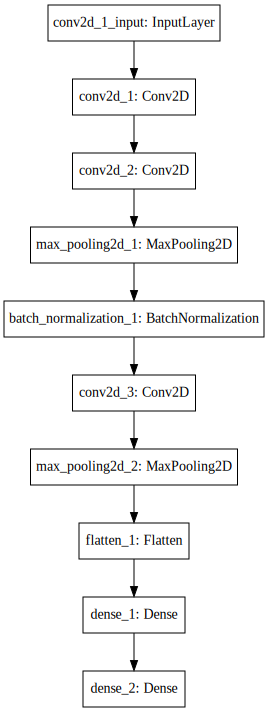

In [7]:
 SVG(model_to_dot(model).create(prog='dot', format='svg'))